# Transfer Learning

* 🤯 Tech companies and university labs have more computational resources than we do
* 😎 Let them train their super complex models on millions of images, and then re-use their kernels for our own CNNs!

🎯 **<u>Goal:</u>**
* ☄️ Use a **Pretrained Neural Network** $ \Leftrightarrow $ **Transfer learning**

## Google Colab Setup

Repeat the same process from the last challenge to upload your challenge folder and open your notebook:

1. access your [Google Drive](https://drive.google.com/)
2. go into the Colab Notebooks folder
3. drag and drop this challenge's folder into it
4. right-click the notebook file and select `Open with` $\rightarrow$ `Google Colaboratory`

Don't forget to enable GPU acceleration!

`Runtime` $\rightarrow$ `Change runtime type` $\rightarrow$ `Hardware accelerator` $\rightarrow$ `GPU`

When this is done, run the cells below and get to work!

In [ ]:
# Mount GDrive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Put Colab in the context of this challenge
import os

# os.chdir allows you to change directories, like cd in the Terminal
os.chdir('/content/drive/MyDrive/Colab Notebooks/data-transfer-learning')

You are now good to go, proceed with the challenge! Don't forget to copy everything back to your PC to upload to Kitt 🚀

## (1) What is a Pre-Trained Neural Network?

* Convolutions are mathematical operations designed to detect specific patterns in input images and use them to classify the images.
* One could imagine that these patterns are not 100% specific to one task but to the input images.

🚀 **Why not re-use these kernels - whose weights have already been optimized - somewhere else?**
- The expectation is that the trained kernels could also help us perform another classification task.
- We are trying to ***transfer*** the knowledge of a trained CNN to a new classification task.


💪 Transfer Learning has two main advantages:
- It takes less time to train a pre-trained model since we are not going to update all the weights but only some of them
- You benefit from state-of-the-art architectures that have been trained on complex images.

## (2) Introduction to  VGG16

📚 ***Reading Section, no code***






In this exercise, we will use the <a href="https://neurohive.io/en/popular-networks/vgg16/">**`VGG-16 Neural Network`**</a>.

> VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”. The model achieves 92.7% top-5 test accuracy in ImageNet, which is a dataset of over 14 million images belonging to 1000 classes. It was one of the famous model submitted to ILSVRC-2014. It makes the improvement over AlexNet by replacing large kernel-sized filters (11 and 5 in the first and second convolutional layer, respectively) with multiple 3×3 kernel-sized filters one after another. VGG16 was trained for weeks and was using NVIDIA Titan Black GPU’s.

VGG16 is a well-known architecture that has been trained on the <a href="https://www.image-net.org/">**`ImageNet dataset`**</a> which is a very large database of images which belong to different categories.

👉 This architecture already learned which kernels are the best for extracting features from the images found in the `ImageNet dataset`.

👉 As you can see in the illustration, the VGG16 involves millions of parameters you don't want to retrain yourself.


<center><img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png" width=400></center>

❓ How does it work in practice ❓

* The first layers are not specialized for the particular task the VGG16 CNN was trained on
* Only the last dense layer is a "classification layers" that can be preceded with a couple of dense layers...  Therefore, we will:
    1. Load the existing VGG16 network
    2. Remove the last fully connected layers
    3. Replace them with some new fully-connected layers (whose weights are randomly set)
    4. Train these last layers on a specific classification task.

😃 Your role is to train only the last layers for your particular problem.

🤓 We will use <a href="https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16">**`tensorflow.keras.applications.VGG16`**</a>

<hr>

## (3) Data loading & Preprocessing

You have two options to load the data into Google Colab.

### (Option 1) Loading the data directly

* You can first get the data onto google Colab thanks to:

`!wget https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip`,

* and then run

`!unzip flowers-dataset.zip`

*This is a very easy option to load the data into your working directory.*

### (Option 2) Adding the data to Google Drive

* You can first download the data from `https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip`.
* Then you have to add it to your Google Drive in a folder called `Deep_learning_data` (for instance)
* And run the following code in the notebook:

```python
from google.colab import drive
drive.mount('/content/drive/')
```

* The previous code will ask you to go to a given webpage where you can copy a temporary key
* Paste it in the cell that will appear in your Colab Notebook
* You can now load the data on your Google Colab Notebooks

### Option 1 or Option 2 ?

* Why choosing option 2 over the option 1?
    * ✅ The combo Colab + Drive can be interesting if you work within a project team, and need to update the data from time to time.
    * ✅ By doing this, you can share the same data folder with your teammates, and be sure that everyone has the same dataset at any time, even though someone changes it.
    * ❌ Google Colab has now access to your Google Folder..., which you may or may not be in favor of, depending on your sensibilities...

---

❓ **Question: Loading your dataset** ❓
    
Use one of the above methods to load your data

In [3]:
from scipy.ndimage import convolve
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from matplotlib import pyplot
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Rescaling


In [4]:
option_1 = True # Choose here

if option_1:
    !wget https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip
    !unzip flowers-dataset.zip
else:
    from google.colab import drive
    drive.mount('/content/drive/')

--2024-02-03 10:07:46--  https://wagon-public-datasets.s3.amazonaws.com/flowers-dataset.zip
Resolving wagon-public-datasets.s3.amazonaws.com (wagon-public-datasets.s3.amazonaws.com)... 52.218.25.2, 52.218.28.146, 52.92.0.57, ...
Connecting to wagon-public-datasets.s3.amazonaws.com (wagon-public-datasets.s3.amazonaws.com)|52.218.25.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104983809 (100M) [application/zip]
Saving to: ‘flowers-dataset.zip’

flowers-dataset.zip 100%[===================>] 100.12M  25.4MB/s    in 4.1s    

2024-02-03 10:07:50 (24.2 MB/s) - ‘flowers-dataset.zip’ saved [104983809/104983809]

Archive:  flowers-dataset.zip
  inflating: flowers/daisy/2607132536_d95198e619_n.jpg  
  inflating: flowers/daisy/6480809771_b1e14c5cc2_m.jpg  
  inflating: flowers/daisy/9350942387_5b1d043c26_n.jpg  
  inflating: flowers/daisy/4065883015_4bb6010cb7_n.jpg  
  inflating: flowers/daisy/7924174040_444d5bbb8a.jpg  
  inflating: flowers/daisy/8740807508_0587f

In [5]:
!pwd

/content


In [6]:
!ls

flowers  flowers-dataset.zip  sample_data


❓ **Question:Train/Val/Test split** ❓

Use the following method to create
`X_train, y_train, X_val, y_val, X_test, y_test, num_classes` depending on the `loading_method` you have used

In [7]:
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import numpy as np
import os
from PIL import Image

def load_flowers_data(loading_method):
    if loading_method == 'colab':
        data_path = '/content/drive/My Drive/Deep_learning_data/flowers'
    elif loading_method == 'direct':
        data_path = 'flowers/'
    classes = {'daisy':0, 'dandelion':1, 'rose':2}
    imgs = []
    labels = []
    for (cl, i) in classes.items():
        images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.jpg')>0]
        for img in tqdm(images_path[:300]):
            path = os.path.join(data_path, cl, img)
            if os.path.exists(path):
                image = Image.open(path)
                image = image.resize((256, 256))
                imgs.append(np.array(image))
                labels.append(i)

    X = np.array(imgs)
    num_classes = len(set(labels))
    y = to_categorical(labels, num_classes)

    # Finally we shuffle:
    p = np.random.permutation(len(X))
    X, y = X[p], y[p]

    first_split = int(len(imgs) /6.)
    second_split = first_split + int(len(imgs) * 0.2)
    X_test, X_val, X_train = X[:first_split], X[first_split:second_split], X[second_split:]
    y_test, y_val, y_train = y[:first_split], y[first_split:second_split], y[second_split:]

    return X_train, y_train, X_val, y_val, X_test, y_test, num_classes

In [8]:
# CALL load_flowers_data WITH YOUR PREFERRED METHOD HERE
X_train, y_train, X_val, y_val, X_test, y_test, num_classes= load_flowers_data('direct')

100%|██████████| 299/299 [00:01<00:00, 248.52it/s]


❓ **Question: Exploring the images** ❓

Check the images' shapes and plot a few of them.

In [9]:
X_train.shape

(571, 256, 256, 3)

In [10]:
np.unique(y_train, return_counts=True)

(array([0., 1.], dtype=float32), array([1142,  571]))

In [11]:
y_train

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [12]:
num_classes

3

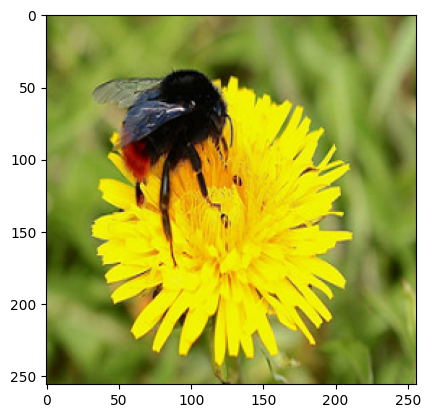

In [13]:
plt.imshow(X_train[98])

## (4) A CNN architecture

First, let's build our own CNN.

❓ **Questions** ❓

1. <u>CNN Architecture and compiler:</u> Create a CNN with your own architecture and a function `load_own_model` that will be able to generate it. Some advice:
    - Incorporate the Rescaling Layer in your Sequential architecture
    - Add three Conv2D/MaxPooling2D combinations with an increasing number of channels and a decreasing size of kernels for example (be creative, that is not a rule of thumb, mastering CNN is an art)
    - Don't forget the Flatten layer and some hidden layers
    - Finish with the predictive layer
    - Compile your CNN model accordingly
  
  
2. <u>Training and comparison</u>:
    - Train your CNN
    - Compare its performance to a baseline accuracy

<details>
    <summary><i>Recommended architecture:</i></summary>

```python
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

model = Sequential()

# Notice this cool new layer that "pipe" your rescaling within the architecture
model.add(Rescaling(1./255, input_shape=(256,256,3)))

# Lets add 3 convolution layers, with relatively large kernel size as our pictures are quite big too
model.add(layers.Conv2D(16, kernel_size=10, activation='relu'))
model.add(layers.MaxPooling2D(3))

model.add(layers.Conv2D(32, kernel_size=8, activation="relu"))
model.add(layers.MaxPooling2D(3))

model.add(layers.Conv2D(32, kernel_size=6, activation="relu"))
model.add(layers.MaxPooling2D(3))

model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
```

        
</details>        

In [14]:
def load_own_model():
    '''instanciate and return the CNN architecture of your choice with less than 150,000 params'''
    model= Sequential()
    model.add(Rescaling(1./255, input_shape=(256,256,3)))

    model.add(layers.Conv2D(32, kernel_size= (10,10), padding='same', strides=(1,1) ,activation= 'relu'))
    model.add(layers.MaxPool2D(pool_size=(3,3)))
    model.add(layers.Conv2D(32, kernel_size= (8,8), padding='same', activation= 'relu'))
    model.add(layers.MaxPool2D(pool_size=(3,3)))
    model.add(layers.Conv2D(128, kernel_size= (6,6), padding='same', activation= 'relu'))
    model.add(layers.MaxPool2D(pool_size=(3,3)))


    model.add(layers.Flatten())
    model.add(layers.Dense(50, activation= 'relu'))
    model.add(layers.Dropout(rate=0.3))
    model.add(layers.Dense(10, activation= 'relu'))
    model.add(layers.Dropout(rate=0.6))

    model.add(layers.Dense(3, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

    return model

In [15]:
model= load_own_model()
es= EarlyStopping(patience=1)
history= model.fit(X_train, y_train, validation_data= (X_val, y_val), batch_size= 32, epochs= 7, callbacks=[es])

Epoch 1/7
18/18 [==============================] - 184s 10s/step - loss: 1.1023 - accuracy: 0.3520 - val_loss: 1.0864 - val_accuracy: 0.4525
Epoch 2/7
18/18 [==============================] - 181s 10s/step - loss: 1.0815 - accuracy: 0.3923 - val_loss: 1.0602 - val_accuracy: 0.5475
Epoch 3/7
18/18 [==============================] - 182s 10s/step - loss: 1.0167 - accuracy: 0.4764 - val_loss: 0.9468 - val_accuracy: 0.6369
Epoch 4/7
18/18 [==============================] - 182s 10s/step - loss: 1.0119 - accuracy: 0.4431 - val_loss: 0.9401 - val_accuracy: 0.5754
Epoch 5/7
18/18 [==============================] - 181s 10s/step - loss: 0.9937 - accuracy: 0.4834 - val_loss: 0.9330 - val_accuracy: 0.5028
Epoch 6/7
18/18 [==============================] - 183s 10s/step - loss: 0.9628 - accuracy: 0.4764 - val_loss: 0.8930 - val_accuracy: 0.6425
Epoch 7/7
18/18 [==============================] - 178s 10s/step - loss: 0.9726 - accuracy: 0.4939 - val_loss: 0.9345 - val_accuracy: 0.5587


In [17]:
res= model.evaluate(X_test, y_test)

5/5 [==============================] - 11s 2s/step - loss: 0.9434 - accuracy: 0.5906


In [18]:
test_accuracy = res[-1]
print(f"test_accuracy = {round(test_accuracy,2)*100} %")

test_accuracy = 59.0 %


🥡 <b><u>Takeaways from building your own CNN</u></b>:
* On an "easy dataset" like the MNIST, it is now easy to reach a decent accuracy. But for a more complicated problem like classifying flowers, it already becomes more challenging. Take a few minutes to play with the following link before moving on to Transfer Learning
    * [PoloClub/CNN-Explainer](https://poloclub.github.io/cnn-explainer/)

## (5) Using a pre-trained CNN = Transfer learning

As we said in the beginning, tech companies and university labs have more computational resources than we do.

🔥 The [**Visual Geometry Group**](https://www.robots.ox.ac.uk/~vgg/data/) *(Oxford University, Department of Science and Engineering)* became famous for some of their **Very Deep Convolutional Neural Networks**: the [**VGG16**](https://www.robots.ox.ac.uk/~vgg/research/very_deep/)

Take 7 minutes of your time to watch this incredible video of Convolutional Layers created by Dimitri Dmitriev.

* 📺 **[VGG16 Neural Network Visualization](https://www.youtube.com/watch?v=RNnKtNrsrmg)**


### (5.1) Load VGG16 model

❓ **Question: loading the VGG16** ❓

* Write a first function `load_model()` that loads the pretrained VGG-16 model from `tensorflow.keras.applications.vgg16`. Have a look at the documentation 📚  [tf/keras/applications/VGG16](https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16)📚

* We will **load the VGG16 model** the following way:
    - 🤯 Let's use the **weights** learned on the [**imagenet dataset**](https://www.image-net.org/download.php) (14M pictures with 20k labels)
    - The **`input_shape`** corresponds to the input shape of your images
        - Note: *You have to resize them down to a consistent shape if they have different height/widths/channels*
    - The **`include_top`** argument should be set to `False`:
        - to avoid loading the weights of the fully-connected layers of the VGG16
        - and also remove the last layer of the VGG16 which was specifically trained on `imagenet`

<i><u>Remark:</u></i> Do not change the default value of the other arguments

In [29]:
from tensorflow.keras.applications.vgg16 import VGG16


In [35]:
from tensorflow.keras.applications.vgg16 import VGG16

def load_model():

    model= VGG16(
      include_top=False,
      weights='imagenet',
      input_tensor=None,
      input_shape=(256,256,3),
      pooling=None,
      classes=1000,
      classifier_activation='softmax'
  )

    return model

❓ **Question: number of parameters in the VGG16** ❓

Look at the architecture of the model using ***.summary()***

In [36]:
model_vgg= load_model()

In [37]:
model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

<img src="https://neurohive.io/wp-content/uploads/2018/11/vgg16-1-e1542731207177.png">

💪 Impressive, right? Two things to notice:
- It ends with a combo Conv2D/MaxPooling2D
- The `layers.Flatten` and the `layers.Dense` are not there yet, we need to add them.
- There are more than 14,000,000 parameters, which is a lot...
    - We could fine-tune them, i.e. update them as we will update the weights of the dense layers, but it will take a lot of time....
    - For this reason, we will inform the model that the layers before the flattening will be set non-trainable.

---

❓ **Question: deactivating the training of the VGG16 paramters** ❓

* Write a first function which:
    - takes the previous model as the input
    - sets the first layers to be non-trainable, by applying **`model.trainable = False`**
    - returns the model.

* Then inspect the summary of the model to check that the parameters are no longer trainable, they were set to be **`non-trainable`**.



In [38]:
def set_nontrainable_layers(model):

    model.trainable = False

    return model

In [40]:
base_model= set_nontrainable_layers(model_vgg).summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

❓ **Question: chaining the pretrained convolutional layers of VGG16 with our own dense layers** ❓

We will write a function that adds flattening and dense layers after the convolutional layers. To do so, we cannot directly use the classic `layers.Sequential()` instantiation.

For that reason, we will discover another way here. The idea is that we define each layer (or group of layers) separately. Then, we concatenate them. Have a look at this example:

---
```python
base_model = load_model()
base_model = set_nontrainable_layers(base_model)
flattening_layer = layers.Flatten()
dense_layer = layers.Dense(SOME_NUMBER_1, activation='relu')
prediction_layer = layers.Dense(SOME_NUMBER_2, activation='APPROPRIATE_ACTIVATION')

model = tf.keras.Sequential([
  base_model,
  flattening_layer,
  dense_layer,
  prediction_layer
])

```
---

* The first line loads a group of layers which is the previous VGG-16 model.
* Then, we set these layers to be non-trainable.
* Eventually, we can instantiate as many layers as we want.
* Finally, we use the `Sequential` with the sequence of layers that will correspond to our overall neural network.

Replicate the following steps by adding:
* a flattening layer
* two dense layers (the first with 500 neurons) to the previous VGG-16 model.

In [43]:
base_model = load_model()
base_model = set_nontrainable_layers(base_model)
flattening_layer = layers.Flatten()
dense_layer = layers.Dense(500, activation='relu')
prediction_layer = layers.Dense(3, activation='softmax')

model = Sequential([
  base_model,
  flattening_layer,
  dense_layer,
  prediction_layer
])

In [44]:
from tensorflow.keras import layers, models

def add_last_layers():
    '''Take a pre-trained model, set its parameters as non-trainable, and add additional trainable layers on top'''
    base_model = load_model()
    base_model = set_nontrainable_layers(base_model)
    flattening_layer = layers.Flatten()
    dense_layer = layers.Dense(500, activation='relu')
    prediction_layer = layers.Dense(3, activation='softmax')

    model = Sequential([
      base_model,
      flattening_layer,
      dense_layer,
      prediction_layer
    ])
    return model

❓ **Question: inspect the parameters of a customized VGG16** ❓

* Now look at the layers and the parameters of your model.
* Note that there is a distinction, at the end, between the **trainable** and **non-trainable parameters**

In [46]:
add_last_layers().summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                                 
 dense_9 (Dense)             (None, 500)               16384500  
                                                                 
 dense_10 (Dense)            (None, 3)                 1503      
                                                                 
Total params: 31100691 (118.64 MB)
Trainable params: 16386003 (62.51 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


❓ **Question: building a function that creates a full customized VGG16 and compiles it** ❓

* Write a function which builds and compiles your model
    * We advise using the _adam_ optimizer with `learning_rate=1e-4`.

In [50]:
from tensorflow.keras import optimizers

def build_model():

    model= add_last_layers()
    model.compile(loss='categorical_crossentropy', optimizer= Adam(learning_rate=0.0001) , metrics=['accuracy'])

    return model


### (5.2) Back to the data

🚨 The VGG16 model was trained on images which were preprocessed in a specific way. This is the reason why we did _NOT_ normalize them earlier.

❓ **Question: preprocessing the dataset** ❓

Apply the specific processing to the original (non-normalized) images here using the method **`preprocess_input`** that you can import from **`tensorflow.keras.applications.vgg16`**

📚 Cf. [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/preprocess_input)

In [51]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [52]:
X_train= preprocess_input(X_train)
X_test= preprocess_input(X_test)
X_val= preprocess_input(X_val)

### (5.3)  Fit the model



❓ **Question: Training the customized VGG16** ❓

* Train the model with an Early stopping criterion on the validation accuracy -
* Since the validation data is provided use `validation_data` instead of `validation_split`.

_As usual, store the results of your training into a `history` variable._

In [55]:
model= build_model()

In [56]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 32768)             0         
                                                                 
 dense_13 (Dense)            (None, 500)               16384500  
                                                                 
 dense_14 (Dense)            (None, 3)                 1503      
                                                                 
Total params: 31100691 (118.64 MB)
Trainable params: 16386003 (62.51 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [57]:
es= EarlyStopping(patience= 5, monitor='val_accuracy')

history= model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=16, epochs= 50, callbacks=[es])

Epoch 1/50
36/36 [==============================] - 589s 16s/step - loss: 2.5892 - accuracy: 0.8214 - val_loss: 3.3362 - val_accuracy: 0.8380
Epoch 2/50
36/36 [==============================] - 582s 16s/step - loss: 0.1593 - accuracy: 0.9790 - val_loss: 2.2463 - val_accuracy: 0.8827
Epoch 3/50
36/36 [==============================] - 582s 16s/step - loss: 0.1040 - accuracy: 0.9877 - val_loss: 2.1840 - val_accuracy: 0.8827
Epoch 4/50
36/36 [==============================] - 583s 16s/step - loss: 0.0431 - accuracy: 0.9947 - val_loss: 3.3093 - val_accuracy: 0.8659
Epoch 5/50
36/36 [==============================] - 583s 16s/step - loss: 9.0286e-06 - accuracy: 1.0000 - val_loss: 2.5514 - val_accuracy: 0.8715
Epoch 6/50
36/36 [==============================] - 582s 16s/step - loss: 1.4990e-04 - accuracy: 1.0000 - val_loss: 2.5731 - val_accuracy: 0.8715
Epoch 7/50
36/36 [==============================] - 575s 16s/step - loss: 4.9061e-08 - accuracy: 1.0000 - val_loss: 2.6041 - val_accuracy: 0

❓ **Question: Looking at the accuracy** ❓

Plot the accuracy for both the train set and and the validation set using the usual function below

In [58]:
def plot_history(history, title='', axs=None, exp_name=""):
    if axs is not None:
        ax1, ax2 = axs
    else:
        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    if len(exp_name) > 0 and exp_name[0] != '_':
        exp_name = '_' + exp_name
    ax1.plot(history.history['loss'], label='train' + exp_name)
    ax1.plot(history.history['val_loss'], label='val' + exp_name)
    #ax1.set_ylim(0., 2.2)
    ax1.set_title('loss')
    ax1.legend()

    ax2.plot(history.history['accuracy'], label='train accuracy'  + exp_name)
    ax2.plot(history.history['val_accuracy'], label='val accuracy'  + exp_name)
    #ax2.set_ylim(0.25, 1.)
    ax2.set_title('Accuracy')
    ax2.legend()
    return (ax1, ax2)

(<Axes: title={'center': 'loss'}>, <Axes: title={'center': 'Accuracy'}>)

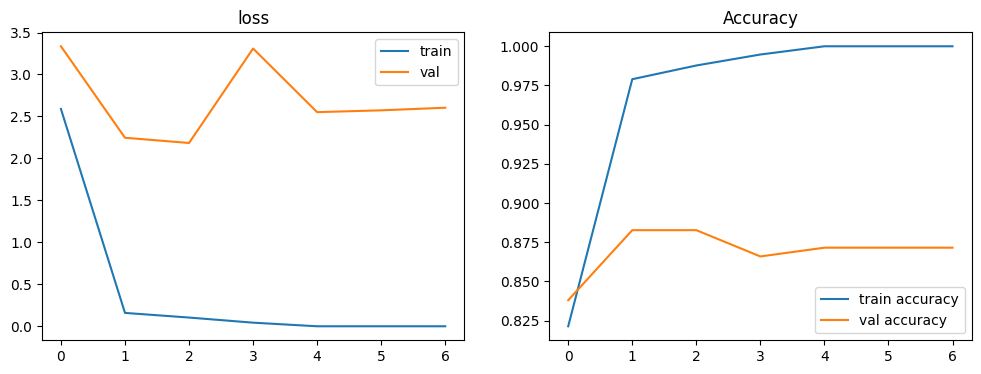

In [59]:
plot_history(history)

❓ **Question: Evaluating the model** ❓

Evaluate the customized VGG16 accuracy on the test set. Did we improve?

In [60]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 116s 23s/step - loss: 1.9247 - accuracy: 0.8859


[1.9247019290924072, 0.8859060406684875]

## (6) (Optional) Improve the model

Now, you can try to improve the model's test accuracy. To do that, here are some options you can consider

1. **Unfreeze and finetune**: Source: [Google tutorial](https://www.tensorflow.org/guide/keras/transfer_learning#fine-tuning)
>_Once your model has converged on the new data, you can try to unfreeze all or part of the base model and retrain the whole model end-to-end with a very low learning rate. This is an optional last step that can potentially give you incremental improvements. It could also potentially lead to quick overfitting -- keep that in mind. It is critical to only do this step after the model with frozen layers has been trained to convergence. If you mix randomly-initialized trainable layers with trainable layers that hold pre-trained features, the randomly-initialized layers will cause very large gradient updates during training, which will destroy your pre-trained features. It's also critical to use a very low learning rate at this stage, because you are training a much larger model than in the first round of training, on a dataset that is typically very small. As a result, you are at risk of overfitting very quickly if you apply large weight updates. Here, you only want to readapt the pretrained weights in an incremental way._


1. Add **Data Augmentation** if your model is overfitting.

2. If your model is not overfitting, try a more complex model.

3. Perform a precise **Grid Search** on all the hyper-parameters: learning_rate, batch_size, data augmentation etc...

4. **Change the base model** to more modern one CNN (ResNet, EfficientNet1,... available in the keras library)

5. Curate the data: maintaining a sane data set is one of the keys to success.

6. Collect more data

## (6.2) Comparing the performances of the CNN, the VGG, and the VGG trained on the augmented dataset

In [ ]:
test_accuracy_aug = res_aug[-1]


print(f"test_accuracy_aug = {round(test_accuracy_aug,2)*100} %")

print(f"test_accuracy_vgg = {round(test_accuracy_vgg,2)*100} %")

print(f"test_accuracy = {round(test_accuracy,2)*100} %")

print(f'Chance level: {1./num_classes*100:.1f}%')



---

🏁 **Congratulations** 🏁

1. Download this notebook from your `Google Drive` or directly from `Google Colab`
2. Drag-and-drop it from your `Downloads` folder to your local challenge folder  


💾 Don't forget to push your code

3. Follow the usual procedure on your terminal inside the challenge folder:
      * *git add transfer_learning.ipynb*
      * *git commit -m "I am the god of Transfer Learning"*
      * *git push origin master*

*Hint*: To find where this Colab notebook has been saved, click on `File` $\rightarrow$ `Locate in Drive`.

🚀 If you have time, move on to the **Autoencoders** challenge!